### Memory

In LangChain agent the memory is tracked by something called the state, we need to save the state somewhere. We do that by using a checkpointer This saves a snapshot of the state.

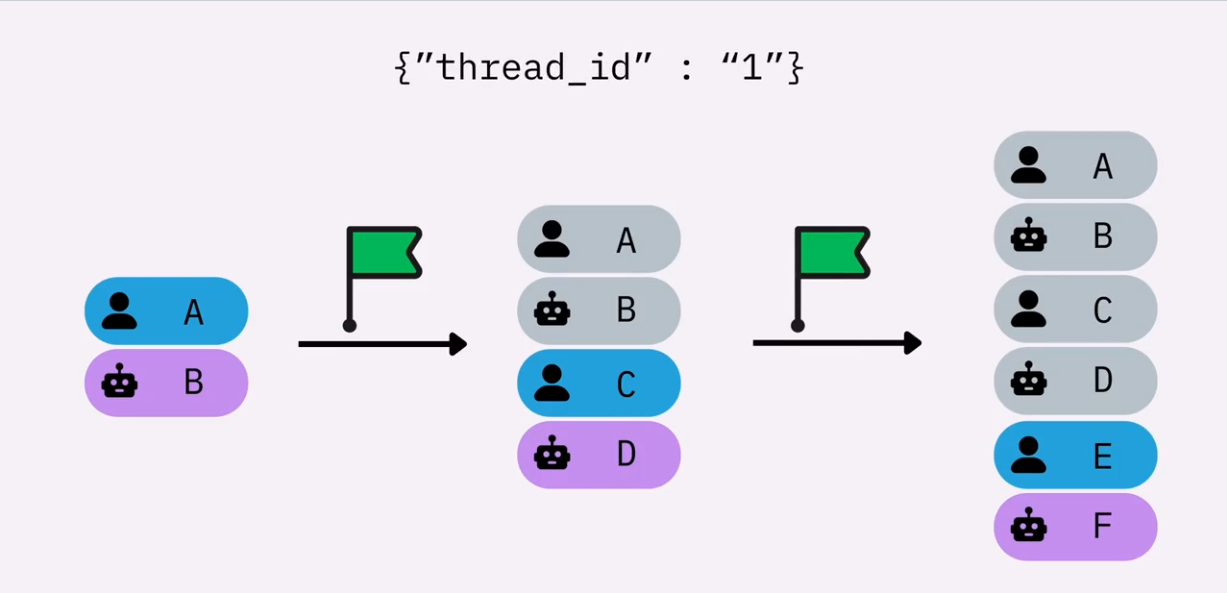

There will be a thread ID to group the states of the conversation together. We invoke the agent using the common thread ID ( config in this case)

By default the memory tracks only messages, we can create custom states with fields in it. 

In [1]:
# Loading the model
from langchain_ollama import ChatOllama
# Load memory checkpoint 
from langgraph.checkpoint.memory import InMemorySaver

model = ChatOllama(model="gemma3:4b", 
                   temperature=0,
                   validate_model_on_init=True,
                   seed=42)

In [2]:
from langchain.agents import create_agent

agent = create_agent(model, 
                     checkpointer=InMemorySaver())

from langchain.messages import HumanMessage

question = HumanMessage(content="Hello my name is Aqua and my favorate color is Blue")
config = {"configurable": {"thread_id":"1"}}

response = agent.invoke(
    {"messages":[question]},
    config,
)

In [3]:
import pprint
pprint.pprint(response)

{'messages': [HumanMessage(content='Hello my name is Aqua and my favorate color is Blue', additional_kwargs={}, response_metadata={}, id='b6b7acda-1b72-448a-ba34-dac4b4051c59'),
              AIMessage(content="Hi Aqua! It's lovely to meet you. Blue is a fantastic color – it's so calming and beautiful. 😊 \n\nWhat do you like to do, Aqua?", additional_kwargs={}, response_metadata={'model': 'gemma3:4b', 'created_at': '2025-12-23T05:09:10.7407454Z', 'done': True, 'done_reason': 'stop', 'total_duration': 15652133600, 'load_duration': 8788964600, 'prompt_eval_count': 21, 'prompt_eval_duration': 1290460200, 'eval_count': 38, 'eval_duration': 5539596000, 'logprobs': None, 'model_name': 'gemma3:4b', 'model_provider': 'ollama'}, id='lc_run--019b499c-3eac-7423-820d-d0a271d0d0c8-0', usage_metadata={'input_tokens': 21, 'output_tokens': 38, 'total_tokens': 59})]}


In [4]:
question = HumanMessage(content="What's my favourite colour?")

response = agent.invoke(
    {"messages": [question]},
    config,  
)

pprint.pprint(response)

{'messages': [HumanMessage(content='Hello my name is Aqua and my favorate color is Blue', additional_kwargs={}, response_metadata={}, id='b6b7acda-1b72-448a-ba34-dac4b4051c59'),
              AIMessage(content="Hi Aqua! It's lovely to meet you. Blue is a fantastic color – it's so calming and beautiful. 😊 \n\nWhat do you like to do, Aqua?", additional_kwargs={}, response_metadata={'model': 'gemma3:4b', 'created_at': '2025-12-23T05:09:10.7407454Z', 'done': True, 'done_reason': 'stop', 'total_duration': 15652133600, 'load_duration': 8788964600, 'prompt_eval_count': 21, 'prompt_eval_duration': 1290460200, 'eval_count': 38, 'eval_duration': 5539596000, 'logprobs': None, 'model_name': 'gemma3:4b', 'model_provider': 'ollama'}, id='lc_run--019b499c-3eac-7423-820d-d0a271d0d0c8-0', usage_metadata={'input_tokens': 21, 'output_tokens': 38, 'total_tokens': 59}),
              HumanMessage(content="What's my favourite colour?", additional_kwargs={}, response_metadata={}, id='a5b44189-3f87-4597-8ad3-

### Multi Modal 

Convert data into base 64 

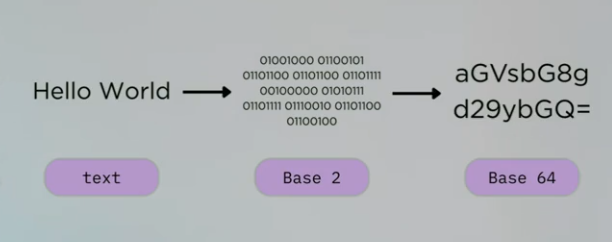

In [5]:
from ipywidgets import FileUpload
from IPython.display import display

uploader = FileUpload(accept='.png', multiple=False)
display(uploader)

FileUpload(value=(), accept='.png', description='Upload')

In [6]:
print(uploader.value)

({'name': 'python-decorator.png', 'type': 'image/png', 'size': 14392, 'content': <memory at 0x00000227708A3DC0>, 'last_modified': datetime.datetime(2025, 12, 20, 11, 59, 31, 290000, tzinfo=datetime.timezone.utc)},)


In [7]:
import base64

# Get the first (and only) uploaded file dict
uploaded_file = uploader.value[0]

# This is a memoryview
content_mv = uploaded_file["content"]

# Convert memoryview -> bytes
img_bytes = bytes(content_mv)  # or content_mv.tobytes()

# Now base64 encode
img_b64 = base64.b64encode(img_bytes).decode("utf-8")

In [8]:
# Craete Agent 
from langchain.agents import create_agent
from langchain.messages import HumanMessage

model = ChatOllama(model="gemma3:4b", 
                   temperature=0,
                   validate_model_on_init=True,
                   seed=42)

agent = create_agent(model)

multimodal_question = HumanMessage(content=[
    {"type": "text", "text": "Tell me about this image"},
    {"type": "image", "base64": img_b64, "mime_type": "image/png"}
])

response = agent.invoke(
    {"messages": [multimodal_question]}
)

print(response['messages'][-1].content)

Okay, let's break down this image, which illustrates a concept called **closures** in Python.

**What is a Closure?**

A closure is a function object that remembers values in the enclosing scope, even after the enclosing scope has finished executing.  In simpler terms, it's a function that "remembers" the variables from the environment where it was created.

**How the Image Represents It**

The image shows a visual representation of the following Python code:

```python
def name(greeting):
    def hello():
        print(greeting + "!")
        return hello

    return hello

my_hello = name("Alice")
my_hello()
```

Let's analyze the image's representation of this code:

1. **`name(greeting)`:**
   - This is the outer function. It takes a `greeting` argument.
   - It defines an inner function called `hello()`.
   - It returns the `hello()` function.

2. **`hello()`:**
   - This is the inner function.
   - It takes no arguments.
   - It prints the `greeting` (which was passed to `name()`